# Extract structured data from Wikidata using Python and SPARQL query
<a href="https://colab.research.google.com/github/maxim75/data-visualization/blob/master/notebooks/query_wikidata.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" /><br/>Open in Colab</a>

## Install mkwikidata

In [37]:
!pip install mkwikidata

## Load data from Wikidata

In [38]:
import mkwikidata

query = """
SELECT DISTINCT ?cityLabel ?population ?gps
WHERE
{
  ?city wdt:P31/wdt:P279* wd:Q515 .
  ?city wdt:P1082 ?population .
  ?city wdt:P625 ?gps .
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "en" .
  }
}
ORDER BY DESC(?population) LIMIT 100
"""
query_result = mkwikidata.run_query(query, params={ })

## Convert response

In [39]:
data = [{"name" : x["cityLabel"]["value"], "population" : int(x["population"]["value"])} for x in query_result["results"]["bindings"]]

## Show results as bar graph

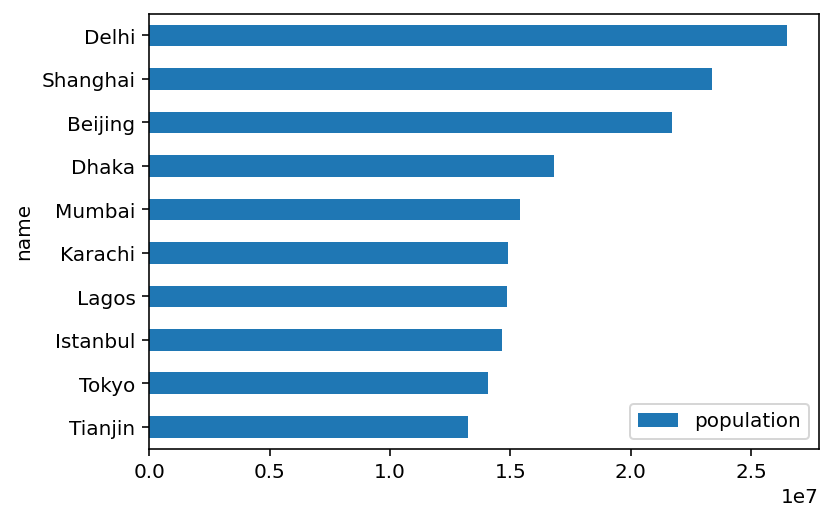

In [40]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
pd.DataFrame(data).set_index("name").head(10).plot.barh().invert_yaxis()